<a href="https://colab.research.google.com/github/Romaiz/Pycharm_Tutorials/blob/main/pytorch_tut_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import torch 
import torch.nn as nn
from torch.optim import SGD
import numpy as np
import matplotlib.pyplot as plt


In [5]:
x = torch.tensor([[1,2,3,-4,5,0,-1], [2,2,-3,-5,12,1,7]])
x

tensor([[ 1,  2,  3, -4,  5,  0, -1],
        [ 2,  2, -3, -5, 12,  1,  7]])

In [7]:
R = nn.ReLU()
R(x)

tensor([[ 1,  2,  3,  0,  5,  0,  0],
        [ 2,  2,  0,  0, 12,  1,  7]])

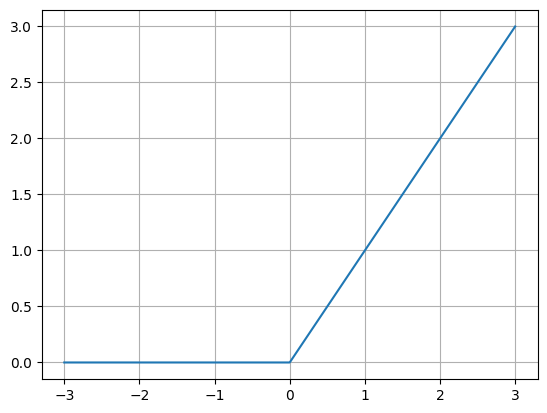

In [12]:
x = torch.linspace(-3,3,1000)
y = R(x)
plt.plot(x.numpy(), y.numpy())
plt.grid()
plt.show()

In [21]:
class myNeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.Matrix1 = nn.Linear(2,10,bias=False)
    self.Matrix2 = nn.Linear(10,1,bias=False)
    self.R = nn.ReLU()
  def forward(self, x):
    x = self.R(self.Matrix1(x))
    x = self.Matrix2(x)
    return x.squeeze()

In [24]:
def train_model(x,y,f,n_epochs = 50):
  optimizer = SGD(f.parameters(), lr=0.001)
  L = nn.MSELoss()

  losses = []
  for _ in range(n_epochs):
    optimizer.zero_grad()
    loss_value = L(f(x), y)
    loss_value.backward()
    optimizer.step()
    losses.append(loss_value.item())
  return f, losses

In [25]:
x = torch.tensor([[6,2], [5,4], [5,9], [5,6], [6,0], [5,7]]).float()
y = torch.tensor([75, 61, 59, 63, 68, 65]).float()
f = myNeuralNetwork()
f, losses = train_model(x,y,f,n_epochs=5000)

In [26]:
y

tensor([75., 61., 59., 63., 68., 65.])

In [27]:
f(x)

tensor([74.9914, 62.7612, 61.2202, 62.1448, 67.9924, 61.8366],
       grad_fn=<SqueezeBackward0>)

In [35]:
class myNewNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.Matrix1 = nn.Linear(2,80)
    self.Matrix2 = nn.Linear(80,80)
    self.Matrix3 = nn.Linear(80,1)
    self.R = nn.ReLU()
  def forward(self, x):
    x = self.R(self.Matrix1(x))
    x = self.R(self.Matrix2(x))
    x = self.Matrix3(x)
    return x.squeeze()

In [36]:
f2 = myNewNN()
f2, losses = train_model(x,y,f2,n_epochs = 5000)

In [31]:
y

tensor([75., 61., 59., 63., 68., 65.])

In [33]:
f(x)

tensor([74.9914, 62.7612, 61.2202, 62.1448, 67.9924, 61.8366],
       grad_fn=<SqueezeBackward0>)

In [37]:
f2(x)

tensor([65.1635, 65.1635, 65.1635, 65.1635, 65.1635, 65.1635],
       grad_fn=<SqueezeBackward0>)